### 77.5% prediction with xgboost

In [60]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

### Loading in the Train and Test dataset

In [61]:
train = pd.read_csv(".../train.csv")
test = pd.read_csv(".../test.csv")

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
#checking for the number of rows and columns in the train dataset
train.shape

(891, 12)

In [65]:
#checking for the number of rows and columns in the test dataset
test.shape

(418, 11)

### Feature Extraction

In [66]:
#check for null values in train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
#check for null values in test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Train dataset

In [68]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
train['Age'].isnull().sum()

177

In [70]:
# Get the initials from the Names
train['Initials'] = train['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [71]:
train['Initials'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Lady              1
Sir               1
Capt              1
Don               1
Jonkheer          1
the Countess      1
Mme               1
Ms                1
Name: Initials, dtype: int64

In [72]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [73]:
train.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [74]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [75]:
train['Age'].isnull().sum()

0

In [76]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [77]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [78]:
#we replace null values in the ship embarked with the mode, 'S'
train['Embarked'].fillna('S', inplace=True)

In [79]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [80]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr


### Data pictorization

#### Pclass Vs. Survived

In [81]:
train.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

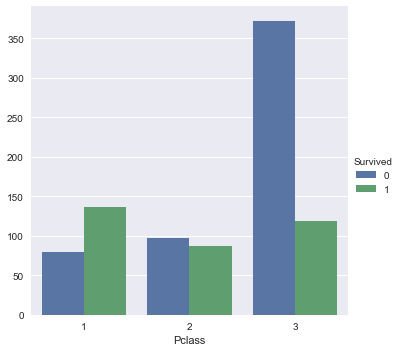

In [82]:
import seaborn as sns

#f, ax = plt.subplots(figsize=(15,13))
sns.catplot(x='Pclass',kind='count', hue='Survived', data=train)
plt.ylabel('')
plt.show()


In [83]:
# This shows that passengers that were in the first class had more survival rate compared to
#       2nd and 3rd class. The survival rate int 3rd class is worst

#### Sex Vs. Survived

In [84]:
train.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

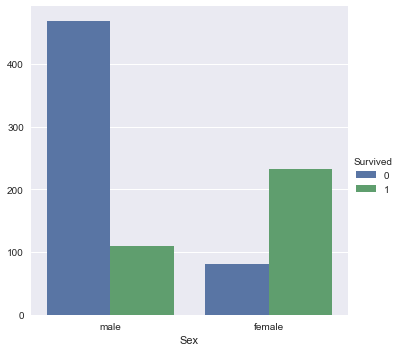

In [85]:
#sns.set(rc={'figure.figsize' :(20,13)})

sns.catplot(x='Sex',kind='count', hue='Survived', data=train)

plt.ylabel('')
plt.show()

#### Embarked Vs. Survived

In [86]:
train.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

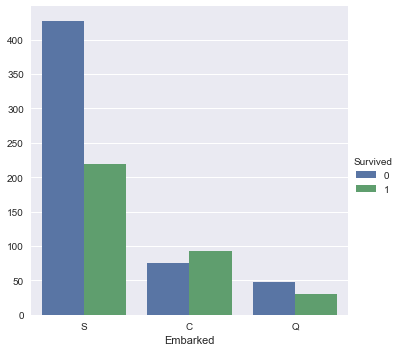

In [87]:
sns.catplot(x='Embarked',kind='count', hue='Survived', data=train)

plt.ylabel('')
plt.show()

#### Initials Vs. Survived

In [88]:
train.groupby('Initials')['Survived'].value_counts()

Initials      Survived
Capt          0             1
Col           0             1
              1             1
Don           0             1
Dr            0             4
              1             3
Jonkheer      0             1
Lady          1             1
Major         0             1
              1             1
Master        1            23
              0            17
Miss          1           127
              0            55
Mlle          1             2
Mme           1             1
Mr            0           436
              1            81
Mrs           1            99
              0            26
Ms            1             1
Rev           0             6
Sir           1             1
the Countess  1             1
Name: Survived, dtype: int64

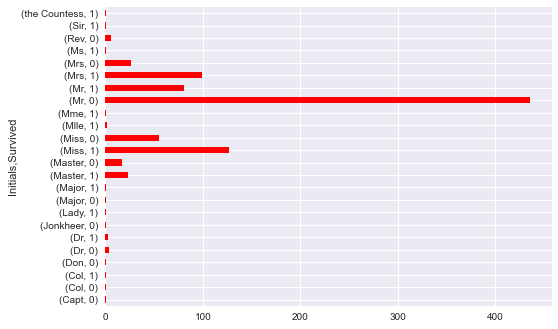

In [89]:
train.groupby('Initials')['Survived'].value_counts().plot(kind='barh', color=['red'])

#### More Explicit Visualization

In [90]:
train.groupby(['Embarked', 'Survived'])['Sex'].value_counts(normalize=True)

Embarked  Survived  Sex   
C         0         male      0.880000
                    female    0.120000
          1         female    0.688172
                    male      0.311828
Q         0         male      0.808511
                    female    0.191489
          1         female    0.900000
                    male      0.100000
S         0         male      0.852459
                    female    0.147541
          1         female    0.648402
                    male      0.351598
Name: Sex, dtype: float64

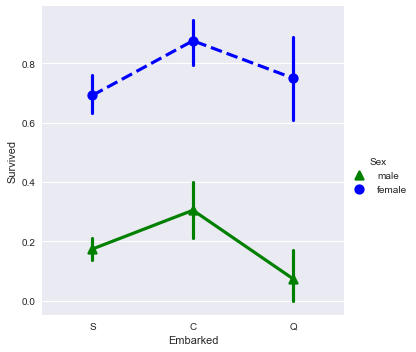

In [91]:
sns.catplot(x='Embarked', y='Survived', hue='Sex', palette={'male':'g', 'female':'b'},
            markers=['^', 'o'], linestyles=['-', '--'],
            kind='point', data=train)

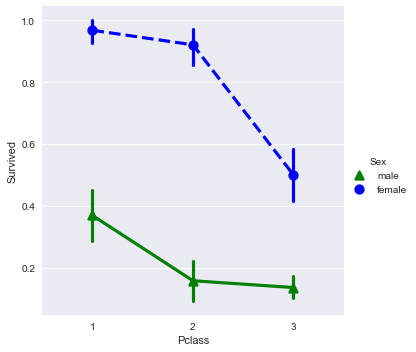

In [92]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', palette={'male':'g', 'female':'b'},
            markers=['^', 'o'], linestyles=['-', '--'],
            kind='point', data=train)

#### Parch Vs. Survived

In [93]:
train.groupby('Parch')['Survived'].value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

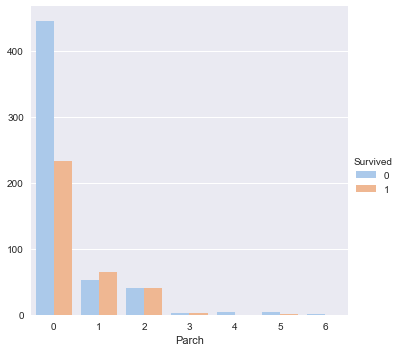

In [94]:
sns.catplot(x='Parch', hue='Survived', kind='count', palette='pastel', data=train)
plt.ylabel('')
plt.show()

#### SibSp Vs. Survived

In [95]:
train.groupby('SibSp')['Survived'].value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

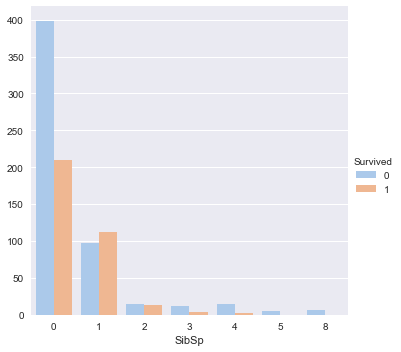

In [96]:
sns.catplot(x='SibSp', hue='Survived', kind='count', palette='pastel', data=train)
plt.ylabel('')
plt.show()

### Test Dataset

In [97]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [98]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [99]:
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [100]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
# Get the initials from the Names
test['Initials'] = test['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [102]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [103]:
combine = train.append(test)

In [104]:
combine.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [105]:
#Fill null values emoty
combine['Survived'].fillna('', inplace=True)

In [106]:
combine.reset_index(inplace=True)

In [107]:
combine.drop(columns=['index'], inplace=True)

In [108]:
combine

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,Dona
1306,1307,,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,Mr


### Classification and Accuracy

In [109]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
combine['Sex']=le.fit_transform(combine['Sex'])
combine['Embarked']=le.fit_transform(combine['Embarked'])

In [110]:
combine

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.2500,NaN,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.2833,C85,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.1000,C123,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.0500,NaN,2,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,NaN,2,Mr
1305,1306,,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C105,0,Dona
1306,1307,,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,Mr
1307,1308,,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,NaN,2,Mr


In [111]:
combine[['Pclass', 'Sex', 'Embarked']]

,Pclass,Sex,Embarked
0,3,1,2
1,1,0,0
2,3,0,2
3,1,0,2
4,3,1,2
...,...,...,...
1304,3,1,2
1305,1,0,0
1306,3,1,2
1307,3,1,2


In [114]:
#creating instance for onehotencoder
he = OneHotEncoder(handle_unknown='ignore')

he_df1=pd.DataFrame(he.fit_transform(combine[['Pclass', 'Sex', 'Embarked']]).toarray())

In [115]:
he_df1

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1304,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1305,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1306,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1307,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [120]:
#We avoid the dummy variable by removing a column from each of the dummy classifiers
he_df1 = he_df1[[1,2,4,6,7]]

In [121]:
he_df1

,1,2,4,6,7
0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...
1304,0.0,1.0,1.0,0.0,1.0
1305,0.0,0.0,0.0,0.0,0.0
1306,0.0,1.0,1.0,0.0,1.0
1307,0.0,1.0,1.0,0.0,1.0


In [123]:
#Merge with the main datframe
combine = combine.join(he_df1)

ValueError: columns overlap but no suffix specified: Index([1, 2, 4, 6, 7], dtype='object')

In [124]:
combine

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,1,2,4,6,7
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.2500,NaN,2,Mr,0.0,1.0,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.2833,C85,0,Mrs,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.1000,C123,2,Mrs,0.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.0500,NaN,2,Mr,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,NaN,2,Mr,0.0,1.0,1.0,0.0,1.0
1305,1306,,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C105,0,Dona,0.0,0.0,0.0,0.0,0.0
1306,1307,,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,Mr,0.0,1.0,1.0,0.0,1.0
1307,1308,,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,NaN,2,Mr,0.0,1.0,1.0,0.0,1.0


In [130]:
#Drop the Pclass, Sex and Embarked columns from the dataframe

combine.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True)

In [168]:
new_train = combine.iloc[:891, :]
new_train

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Initials,1,2,4,6,7
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,Mr,0.0,1.0,1.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,Mrs,0.0,0.0,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0.0,1.0,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,Mrs,0.0,0.0,0.0,0.0,1.0
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,Mr,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,Rev,1.0,0.0,1.0,0.0,1.0
887,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,Miss,0.0,0.0,0.0,0.0,1.0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,Miss,0.0,1.0,0.0,0.0,1.0
889,890,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,Mr,0.0,0.0,1.0,0.0,0.0


In [169]:
new_test = combine.iloc[891:, :]
new_test

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Initials,1,2,4,6,7
891,892,,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,Mr,0.0,1.0,1.0,1.0,0.0
892,893,,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,Mrs,0.0,1.0,0.0,0.0,1.0
893,894,,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,Mr,1.0,0.0,1.0,1.0,0.0
894,895,,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,Mr,0.0,1.0,1.0,0.0,1.0
895,896,,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,Mrs,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,Mr,0.0,1.0,1.0,0.0,1.0
1305,1306,,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,Dona,0.0,0.0,0.0,0.0,0.0
1306,1307,,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Mr,0.0,1.0,1.0,0.0,1.0
1307,1308,,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,NaN,Mr,0.0,1.0,1.0,0.0,1.0


In [183]:
X = new_train.iloc[:, [10,11,12,13,14]].values

y = new_train.iloc[:, 1].values

X_test = new_test.iloc[:,[10,11,12,13,14]].values

X.shape, y.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [184]:
y=y.astype(int)

In [185]:
#split the dataset into training and test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=418/1309, random_state=0)

In [186]:
#Import possible classification libraries
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [189]:
# fitting Logistic Regression to training dataset
logistic_regression = LogisticRegression(random_state=0)

logistic_regression.fit(X, y)

pred_lr = logistic_regression.predict(X_test)

acc_lg = round(logistic_regression.score(X, y) * 100, 2)
print (acc_lg)

pred_lr

78.68


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [190]:
# fitting Decision Tree to training dataset

cla =DecisionTreeClassifier()

cla.fit(X, y)

pred_dtc = cla.predict(X_test)

acc_dtc = round(cla.score(X, y) * 100, 2)
print (acc_dtc)


pred_dtc

81.14


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [191]:
# fitting Random Forest to training dataset

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X, y)

pred_rfc = clf.predict(X_test).astype(int)

acc_rfc = round(cla.score(X, y) * 100, 2)
print (acc_rfc)

pred_rfc

# Random Forest Classification gives the highest score and we use this to predict our data

81.14


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [192]:
# fitting Linear SVM to training dataset

from sklearn.svm import LinearSVC
svc_model = LinearSVC(random_state=0)

pred_svc = svc_model.fit(X, y).predict(X_test)

acc_svc = round(svc_model.score(X, y) * 100, 2)
print (acc_svc)

pred_svc

78.68


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Submission to Kaggle

In [194]:
final_prediction = pd.DataFrame({"PassengerId":  test["PassengerId"], "Survived": pred_rfc})
                           
final_prediction.to_csv('RandomForestClass.csv', index=False)